<a href="https://colab.research.google.com/github/Finisher7604/ML-DL-RL/blob/main/DRL_LSTM_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/testset.csv")
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()
print(len(df))
df.head()

100990


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


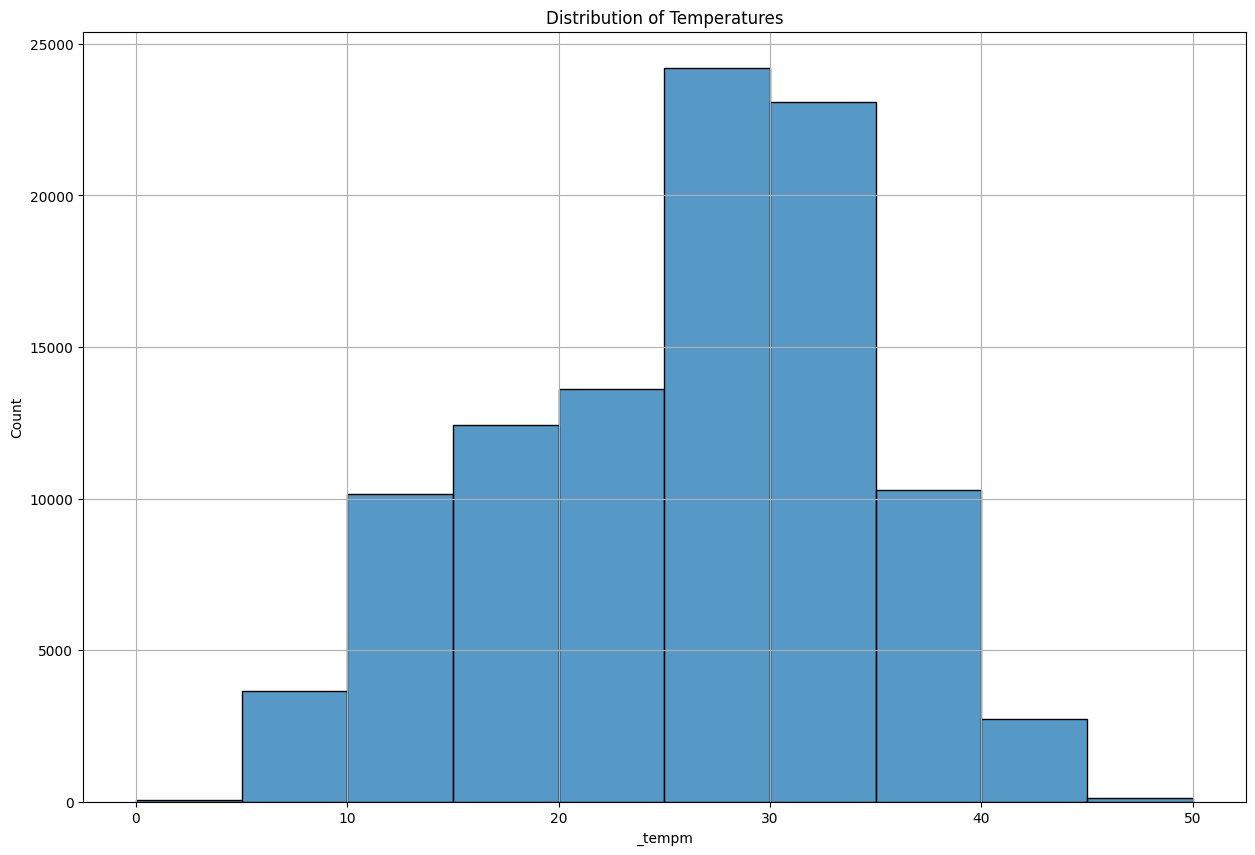

In [ ]:
#distribution of temp over the data
plt.figure(figsize=(15, 10))
sns.histplot(df['_tempm'],bins=[i for i in range(0,55,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

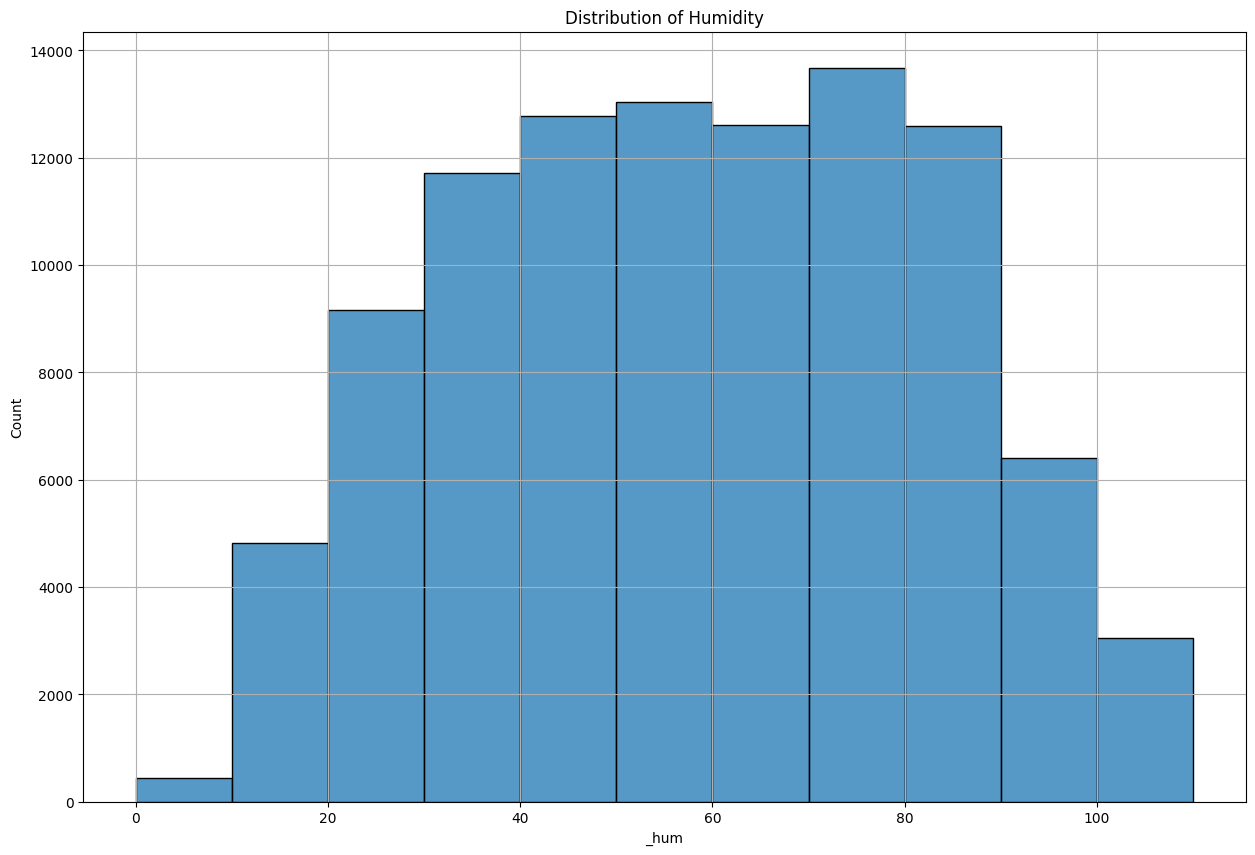

In [ ]:
#distribution of humidity over the data
plt.figure(figsize=(15, 10))
sns.histplot(df['_hum'],bins=[i for i in range(0,120,10)], kde=False)
plt.title("Distribution of Humidity")
plt.grid()
plt.show()

In [ ]:
df.index = pd.to_datetime(df.datetime_utc)
#columns required
required_cols = ['_dewptm', '_fog', '_hail', '_hum', '_rain', '_snow', '_tempm', '_thunder', '_tornado']
df = df[required_cols]
df.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [ ]:
df.isna().sum()

,0
_dewptm,621
_fog,0
_hail,0
_hum,757
_rain,0
_snow,0
_tempm,673
_thunder,0
_tornado,0


In [ ]:
df = df.fillna(method='ffill')
df.tail()

<ipython-input-7-0ef17edbccae>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
2017-04-24 06:00:00,17.0,0,0,25.0,0,0,34.0,0,0
2017-04-24 09:00:00,14.0,0,0,16.0,0,0,38.0,0,0
2017-04-24 12:00:00,12.0,0,0,14.0,0,0,36.0,0,0
2017-04-24 15:00:00,15.0,0,0,27.0,0,0,32.0,0,0
2017-04-24 18:00:00,15.0,0,0,30.0,0,0,30.0,0,0


In [ ]:
df_final = df.resample('D').mean()
df_final.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


In [ ]:
print(len(df_final))

7480


In [ ]:
df_final.isna().sum()

,0
_dewptm,141
_fog,141
_hail,141
_hum,141
_rain,141
_snow,141
_tempm,141
_thunder,141
_tornado,141


In [ ]:
df_final = df_final.fillna(method='ffill')
df_final.isna().sum()

<ipython-input-10-178ad6498d78>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final = df_final.fillna(method='ffill')


,0
_dewptm,0
_fog,0
_hail,0
_hum,0
_rain,0
_snow,0
_tempm,0
_thunder,0
_tornado,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_final)
sequence_length = 10
target_indices = [3, 6]  # _hum, _tempm

sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][target_indices]
    sequences.append(seq)
    labels.append(label)

sequences = np.array(sequences)
labels = np.array(labels)

#Train-test split
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (5976, 10, 9)
Train Y shape: (5976, 2)
Test X shape: (1494, 10, 9)
Test Y shape: (1494, 2)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#Model
model = Sequential()
model.add(LSTM(128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=2))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,546 (517.76 KB)

 Trainable params: 132,546 (517.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0757 - val_loss: 0.0101
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0175 - val_loss: 0.0095
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0168 - val_loss: 0.0100
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0153 - val_loss: 0.0088
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0141 - val_loss: 0.0084
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0137 - val_loss: 0.0082
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0129 - val_loss: 0.0073
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0120 - val_loss: 0.0070
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0114 - val_loss: 0.0065
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0110 - val_loss: 0.0068
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0106 - val_loss: 0.0062
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step

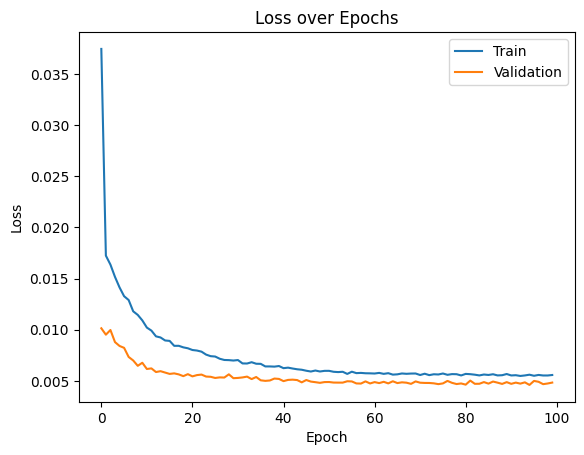

In [ ]:
#loss over epochs plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
predicted = model.predict(test_x)

#Inverse scaling
dummy_actual = test_x[:, -1, :].copy()
dummy_predicted = dummy_actual.copy()
dummy_actual[:, target_indices] = test_y
dummy_predicted[:, target_indices] = predicted
inversed_actual = scaler.inverse_transform(dummy_actual)
inversed_predicted = scaler.inverse_transform(dummy_predicted)
actual_temp = inversed_actual[:, 6]
pred_temp = inversed_predicted[:, 6]
actual_hum = inversed_actual[:, 3]
pred_hum = inversed_predicted[:, 3]

test_dates = df_final.index[sequence_length + train_size:]
results_df = pd.DataFrame({
    'date': test_dates,
    'actual_temp': actual_temp,
    'pred_temp': pred_temp,
    'actual_hum': actual_hum,
    'pred_hum': pred_hum
}).set_index('date')

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


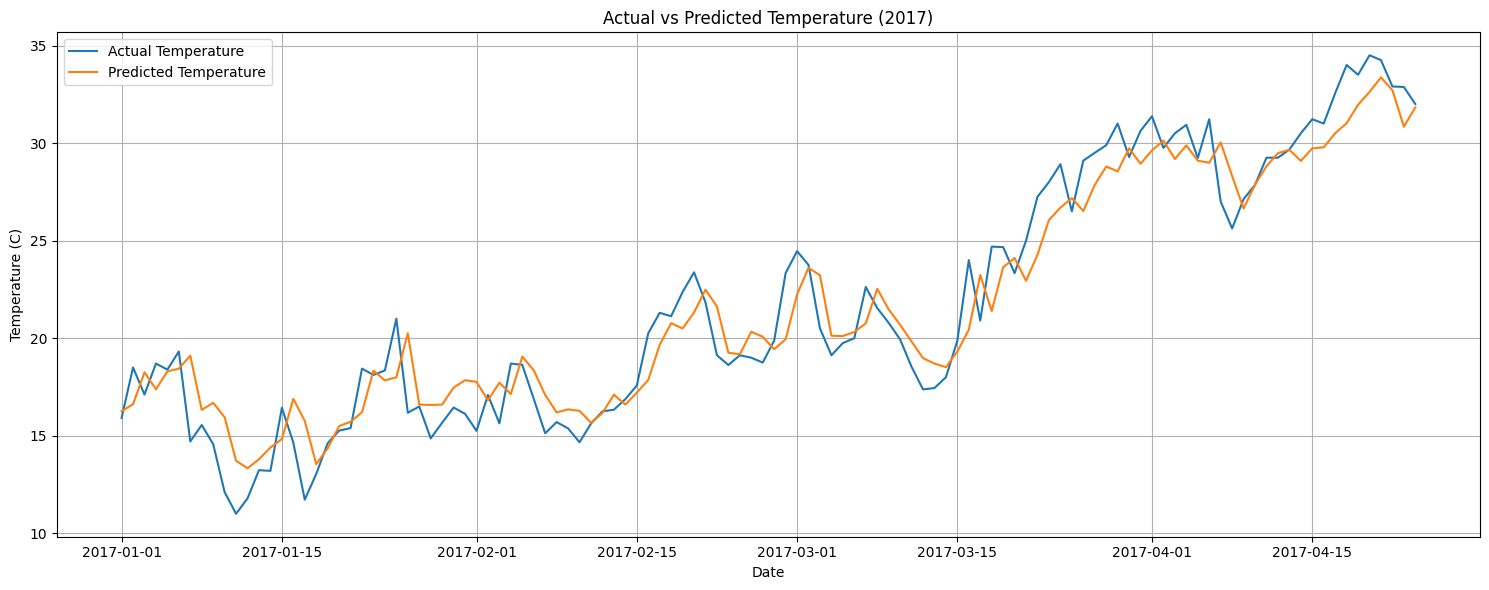

In [ ]:
#Ploting predictions of year 2017 of temperature
one_year_df = results_df[results_df.index.year == 2017]
plt.figure(figsize=(15, 6))
plt.plot(one_year_df.index, one_year_df['actual_temp'], label='Actual Temperature')
plt.plot(one_year_df.index, one_year_df['pred_temp'], label='Predicted Temperature')
plt.title('Actual vs Predicted Temperature (2017)')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

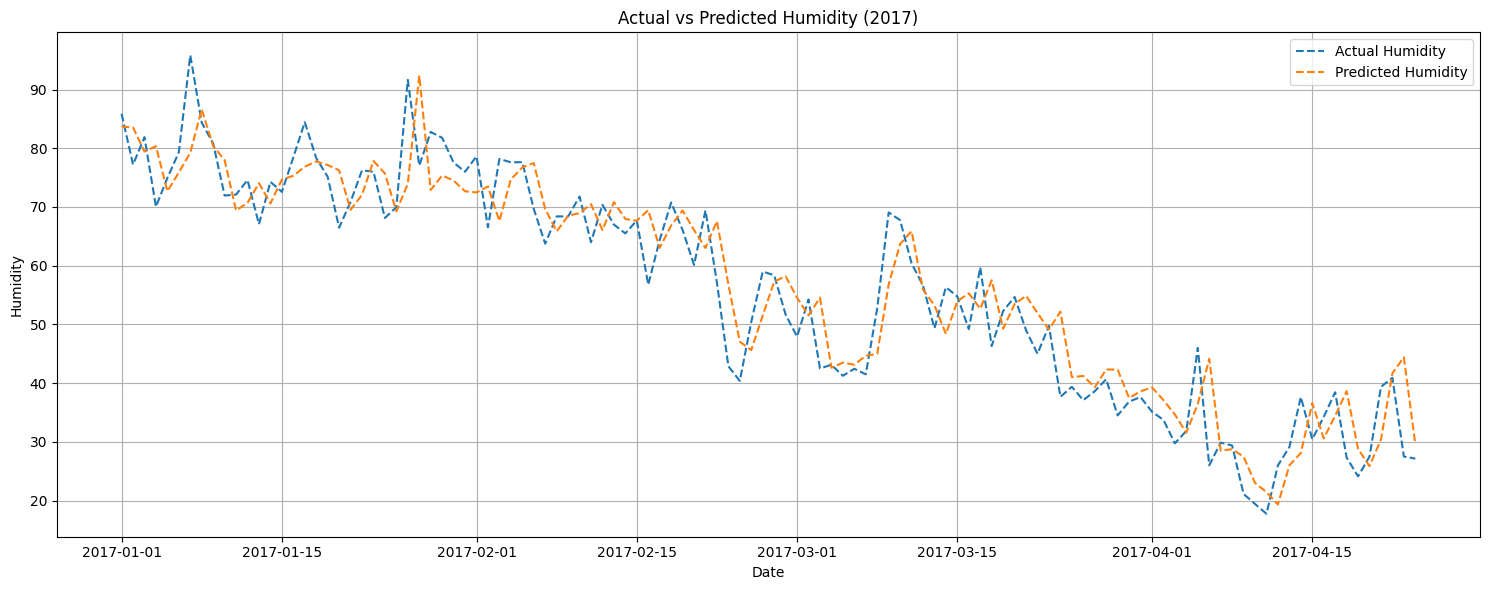

In [ ]:
#Ploting predictions of year 2017 of humidity
one_year_df = results_df[results_df.index.year == 2017]
plt.figure(figsize=(15, 6))
plt.plot(one_year_df.index, one_year_df['actual_hum'], label='Actual Humidity', linestyle='--')
plt.plot(one_year_df.index, one_year_df['pred_hum'], label='Predicted Humidity', linestyle='--')
plt.title('Actual vs Predicted Humidity (2017)')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Temperature Forecasting:")
print("MAE:", mean_absolute_error(actual_temp, pred_temp))
print("RMSE:", np.sqrt(mean_squared_error(actual_temp, pred_temp)))
print("R² Score:", r2_score(actual_temp, pred_temp))

print("\nHumidity Forecasting:")
print("MAE:", mean_absolute_error(actual_hum, pred_hum))
print("RMSE:", np.sqrt(mean_squared_error(actual_hum, pred_hum)))
print("R² Score:", r2_score(actual_hum, pred_hum))

Temperature Forecasting:
MAE: 1.349658701079455
RMSE: 1.686022205543428
R² Score: 0.9444190684707302

Humidity Forecasting:
MAE: 5.648127940022385
RMSE: 7.477056393937901
R² Score: 0.8079341122086958


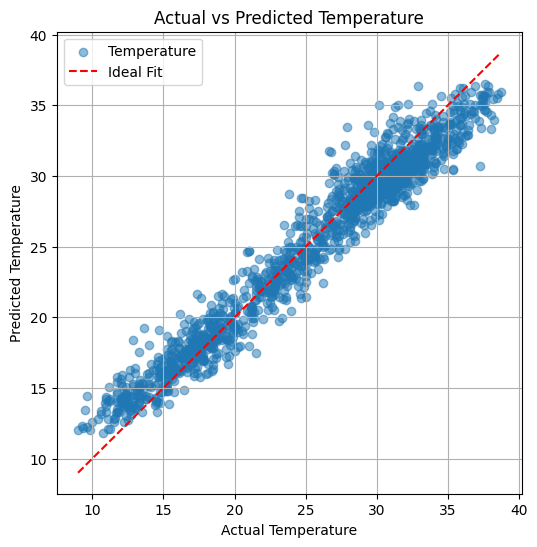

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(actual_temp, pred_temp, alpha=0.5, label='Temperature')
plt.plot([min(actual_temp), max(actual_temp)], [min(actual_temp), max(actual_temp)], 'r--', label='Ideal Fit')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.grid()
plt.show()

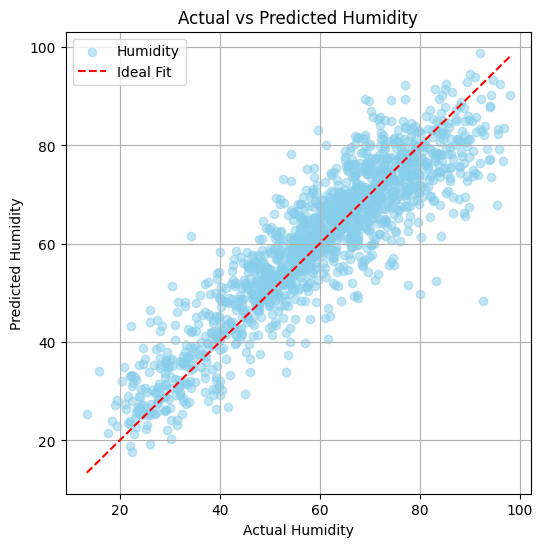

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(actual_hum, pred_hum, alpha=0.5, color='skyblue', label='Humidity')
plt.plot([min(actual_hum), max(actual_hum)], [min(actual_hum), max(actual_hum)], 'r--', label='Ideal Fit')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.title('Actual vs Predicted Humidity')
plt.legend()
plt.grid()
plt.show()